## 환경설정 및 데이터 파일 업로드


colab 환경에서 그래프에 한글 폰트 사용을 위해 다음을 코드를 실행시킵니다.<br>
실행이 완료되면 메뉴의 [런타임]-[런타임다시시작]을 선택하고, 런타임 다시 시작창에서 [예]를 선택합니다.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

내 컴퓨터에 있는 데이터 파일을 업로드 합니다.

In [ ]:
from google.colab import files
myfile = files.upload()

Saving 대출자료.csv to 대출자료.csv
Saving 삼양분식(L).csv to 삼양분식(L).csv


업로드된 파일을 사용할 수 있도록 준비하고, 간단히 내용을 확인합니다.
시작 부분의 데이터를 살펴보면 간단한 정보들을 확인할 수 있습니다.
또 len(data) 명령어로 데이터가 총 몇개의 행으로 되어 있는지 확인할 수 있습니다.

In [ ]:
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(myfile['대출자료.csv']))

# 처음 5개의 데이터를 확인
data.head()

,번호,대출자,등록번호,자료명,청구기호,대출일,반납예정일,연장회수,상태
0,1,김○만,GE0000000562,미술관에 간 화학자,650.4 전82ㅁ c.2,2021.03.02 10:26:30,2023.11.26,0,정상
1,2,김○만,GE0000000563,미술관에 간 화학자,650.4 전82ㅁ c.3,2021.03.02 10:26:31,2023.11.26,0,정상
2,3,김○만,GE0000000561,미술관에 간 화학자,650.4 전82ㅁ,2021.03.02 10:26:32,2023.11.26,0,정상
3,4,김○만,GE0000013056,미술관에 간 화학자,650.4 전82ㅁ c.4,2021.03.02 10:26:34,2023.11.26,0,정상
4,5,김○만,GE0000018194,미술관에 간 화학자,650.4 전82ㅁ c.5,2021.03.02 10:26:35,2023.11.26,0,정상


In [ ]:
        # 데이터의 행수 세기

## 데이터 분석 및 시각화

데이터에 나타나는 대출자 이름과 횟수를 누적합니다.

In [ ]:
# 대출자 명단과 대출횟수를 저장한 딕셔너리 준비
borrower = {}

for i in range(len(data.index)):  # 데이터 파일의 첫 행부터 마지막 행까지 반복
  row = data.iloc[i]  # 데이터 행의 값을 row에 저장
  name = row['대출자']  # 데이터 행의 대출자 이름을 name 에 저장

  if name in borrower:  # 대출자 이름이 존재하면 대출횟수를 1 증가
    borrower[name] += 1
  else:                 # 대출자 이름이 없으면 대출자 이름 추가하고 대출횟수를 1로 초기화
    borrower[name] = 1

print(borrower)
print(len(borrower))

{'김○만': 19, '심○영': 8, '전○서': 21, '성○중': 7, '이○혜': 29, '김○운': 7, '한○민': 2, '조○환': 1, '윤○석': 7, '김○정': 28, '김○영': 4, '이○은': 40, '김○주': 37, '박○윤': 232, '김○현': 19, '최○나': 36, '김○희': 5, '최○선': 27, '김○리': 34, '신○정': 22, '이○재': 3, '조○윤': 2, '정○훈': 17, '이○건': 1, '이○영': 3, '김○화': 14, '박○규': 14, '김○수': 17, '이○우': 7, '임○빈': 5, '장○명': 11, '김○진': 9, '이○환': 1, '이○숙': 11, '이○구': 1, '한○원': 32, '박○연': 71, '윤○혁': 1, '김○범': 3, '김○우': 5, '이○찬': 2, '김○성': 4, '정○희': 7, '전○호': 9, '조○원': 9, '김○순': 1, '박○형': 11, '박○준': 6, '김○윤': 7, '안○우': 5, '배○빈': 5, '노○준': 1, '서○승': 9, '김○완': 4, '윤○성': 1, '오○웅': 1, '최○화': 2, '송○진': 2, '이○규': 1, '서○향': 13, '김○민': 1, '김○상': 1, '김○서': 5, '박○희': 2, '송○석': 2, '임○혁': 2, '진○후': 2, '선○현': 1, '정○우': 6, '김○준': 3, '홍○원': 3, '황○한': 6, '이○권': 1, '조○우': 1, '유○혁': 6, '김○림': 3, '김○숙': 11, '하○현': 7, '한○수': 4, '박○순': 9, '정○옥': 7, '최○은': 4, '정○원': 9, '김○향': 5, '한○정': 4, '김○효': 3, '신○준': 1, '이○주': 2, '이○형': 2, '이○하': 7, 'J○n': 1, '이○윤': 2, '최○영': 2, '김○연': 3, '강○욱': 3, '윤○빈': 1, '류○찬': 3, '김○섭'

대출 횟수가 많은 상위 10명의 명단과 대출 횟수 구하기

In [ ]:
borrower_list = sorted(borrower.items(), key=lambda x: x[1], reverse=True)    # 대출횟수가 많은 순으로 정렬
print(borrower_list)
for i in borrower_list[:10]:
  print("이름:", i[0], "대출횟수:", i[1])
                  # 상위 10개의 데이터 출력
                  # 이름과 대출횟수 출력

[('박○윤', 232), ('박○연', 71), ('이○은', 40), ('김○주', 37), ('최○나', 36), ('김○리', 34), ('한○원', 32), ('이○혜', 29), ('김○정', 28), ('최○선', 27), ('신○정', 22), ('전○서', 21), ('김○만', 19), ('김○현', 19), ('정○훈', 17), ('김○수', 17), ('김○화', 14), ('박○규', 14), ('서○향', 13), ('장○명', 11), ('이○숙', 11), ('박○형', 11), ('김○숙', 11), ('김○찬', 10), ('김○진', 9), ('전○호', 9), ('조○원', 9), ('서○승', 9), ('박○순', 9), ('정○원', 9), ('심○영', 8), ('성○중', 7), ('김○운', 7), ('윤○석', 7), ('이○우', 7), ('정○희', 7), ('김○윤', 7), ('하○현', 7), ('정○옥', 7), ('이○하', 7), ('구○모', 7), ('박○현', 7), ('박○준', 6), ('정○우', 6), ('황○한', 6), ('유○혁', 6), ('김○하', 6), ('김○희', 5), ('임○빈', 5), ('김○우', 5), ('안○우', 5), ('배○빈', 5), ('김○서', 5), ('김○향', 5), ('김○탁', 5), ('이○현', 5), ('유○우', 5), ('김○영', 4), ('김○성', 4), ('김○완', 4), ('한○수', 4), ('최○은', 4), ('한○정', 4), ('김○헌', 4), ('이○성', 4), ('최○원', 4), ('김○선', 4), ('장○민', 4), ('이○재', 3), ('이○영', 3), ('김○범', 3), ('김○준', 3), ('홍○원', 3), ('김○림', 3), ('김○효', 3), ('김○연', 3), ('강○욱', 3), ('류○찬', 3), ('정○린', 3), ('예○우', 3), ('윤○영', 3), ('

대출 횟수가 많은 상위 10명의 명단과 대출 횟수로 시각화하기

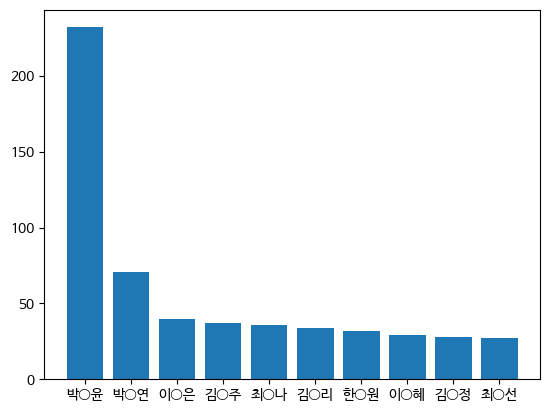

In [ ]:
import matplotlib.pyplot as plt

name = []           # name 리스트 생성 - 이름
amount = []           # amount 리스트 생성 - 대출 횟수

for i in borrower_list[:10]:
  name.append(i[0])           # 상위 10개의 데이터 출력
  amount.append(i[1])                     #  name 리스트에 이름 저장
                       #  amount 리스트에 대출횟수 저장


plt.rc('font', family='NanumBarunGothic')     # 한글 사용을 위한 폰트 지정
plt.bar(name, amount)                         # 요일과 매출금액으로 막대 그래프 그리기
plt.show()

In [ ]:
#데이터 분석과 시각화 수업(식당 문제, 도서대여 순위 문제)을 통해 새롭게 알게 된 점과 느낀점 쓰기
# 지금까지 코딩을 할 때 대부분 표준입출력만을 사용했었지만 csv파일에 있는 데이터들을 직접적으로 분석해보며 색다른 경험을 느꼈습니다.
# 파이썬에서 외장 라이브러리를 이용해 파일을 분석하는 방법을 새롭게 알게 되었습니다.

In [ ]:
# 앞으로 분석해 보고 싶은 주제 1가지 쓰기
# 웹에 있는 자료들을 직접적으로 분석해보고 싶습니다.